<a href="https://colab.research.google.com/github/marcelaaferrari/imersao-python/blob/main/imersao_python_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# Baixar dados dos ultimos 4 anos para uma ação especifica
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [ ]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [ ]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds','Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [ ]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1aa3fx6g/eqi_y0k5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1aa3fx6g/zxl121oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78917', 'data', 'file=/tmp/tmp1aa3fx6g/eqi_y0k5.json', 'init=/tmp/tmp1aa3fx6g/zxl121oq.json', 'output', 'file=/tmp/tmp1aa3fx6g/prophet_model441p9gr7/prophet_model-20240418223049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)  # Prever 150 dias no futuro
previsao = modelo.predict(futuro)

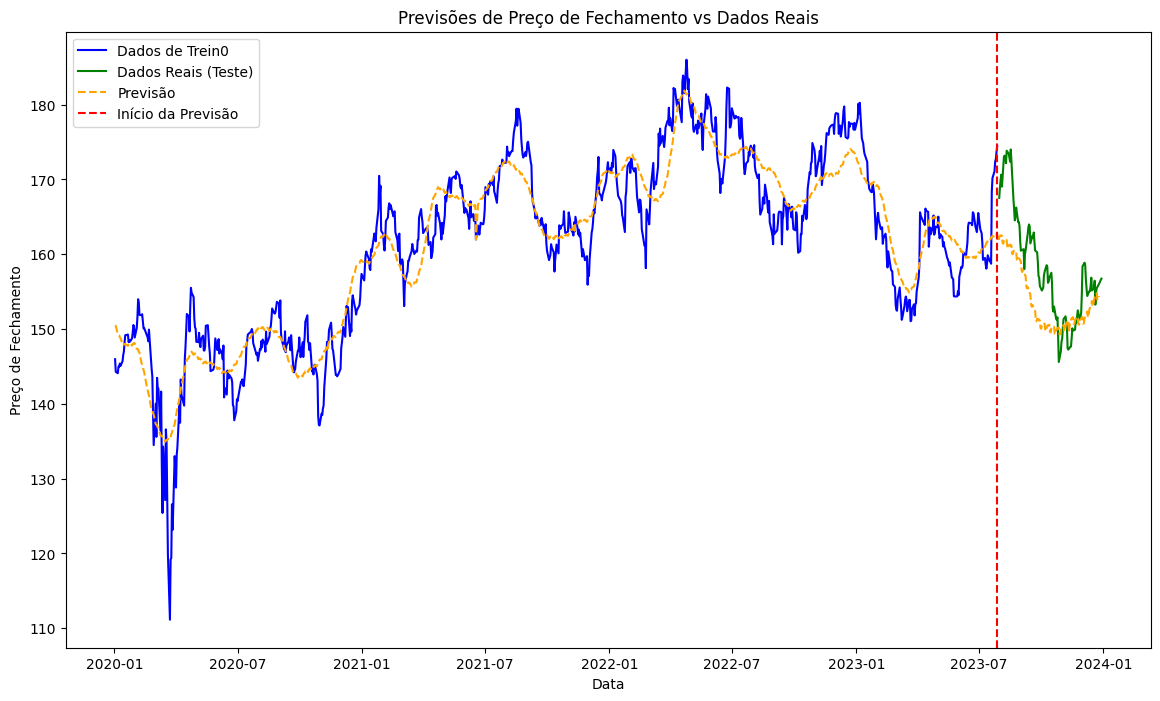

In [ ]:
# Tamanho da imagem
plt.figure(figsize=(14,8))

# Plotar dados de treino
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Trein0', color='blue')

# Plotar dados de teste
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')

# Plotar previsões
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

# Adicionar legendas e rótulos
plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsões de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()